<p style="text-align:center; font-size:300%; line-height:300%; font-weight:bold; background-color:#2F52A3; color:white">Interpolation</p>

<div style="font-weight:bold; background-color:#61C3CE">
    Evaluation :
    <ul>
        <li>Polynôme d'interpolation via la résolution de systèmes.</li>
        <li>Polynôme d'interpolation de Lagrange.</li>
    </ul>
</div>

**Recommandations :**

+ Respectez rigoureusement l'interface des fonctions, et les consignes.
+ Copiez-collez le code de votre fonction (ne contenant aucun print ou autre effet de bord)
+ Utilisez les alias définis ci-dessous.
+ Même si vous travaillez à plusieurs, faites un dépôt par personne.


**Objectifs :**

+ Comprendre des usages de l'interpolation
+ Implémenter une méthode d'interpolation : affine par morceaux, splines, polynômes de Lagrange
+ Connaitre le phénomène de Runge
+ Utiliser des systèmes linéaires pour résoudre des problèmes d'interpolation 1D, 2D
+ Utliser un outil d'interpolation pour construire une graphique

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import random

from scipy.interpolate import interp1d

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Les paragraphes "pour aller plus loin" sont à traiter en seconde lecture, après avoir fini tous les autres points

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Introduction</p>

+ Etant donné un nuage de points, la problématique de l'interpolation est de contruire une fonction passant par tous les points du nuage.
+ A partir d'un nuage de point, le problème est de modéliser ce nuage par une fonction. La fonction servant alors à déduire des valeurs manquantes.
+ Inversement, une méthode d'interpolation accompagnée d'un nuage de point permet de représenter en machine, de manière efficace, une courbe, une image (SVG), un objet (3D), etc.

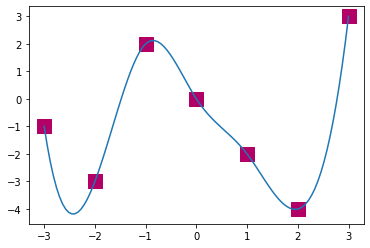

In [2]:
"""
ATTENTION : Il y a peut-être un problème de compatibilité avec les couleurs.
Dans ce document, on utilise la syntaxe [[R,G,B]].
Si elle ne fonctionne pas, remplacer par (R,G,B)
"""

# Une nuage de points

X = np.array([-3.0,-2.0,-1.0, 0.0, 1.0, 2.0, 3.0])
Y = np.array([-1.0,-3.0, 2.0, 0.0,-2.0,-4.0, 3.0])

plt.scatter(X,Y,s = 200, marker = 's', color = [[0.7,0.0,0.4]]) # s : size; marker "square"

x = np.linspace(-3,3,100)
f = interp1d(X,Y,kind='cubic')

plt.plot(x,f(x))
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP : Fonction "sur l'étagère"</p>

Utilisez la fonction `interp1d` : faites $3$ appels avec des arguments différents, avec le nuage de points ci-dessous et en vous aidant des documents de référence. 

+ <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html">Référence sur la fonction `interp1d`</a>
+ <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html">Tutoriel sur l'interpolation</a>

Faites une répresentation graphique des résultats.

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

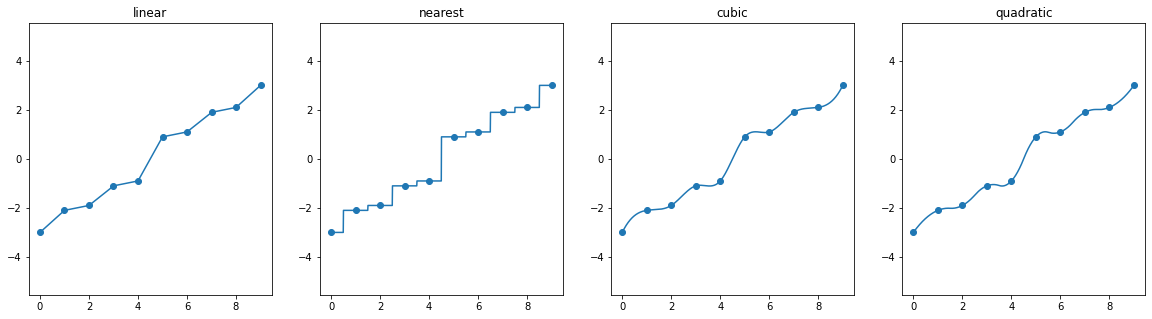

In [84]:
# Insérez vos tests

X = np.array([-3.0,-2.1,-1.9,-1.1,-0.9, 0.9, 1.1, 1.9, 2.1, 3.0])
Y = np.array([-1.0,-1.0, 1.0, 1.0,-2.0,-2.0, 2.0, 2.0, 0.0, 0.0])

N = np.arange(X.shape[0])
U = np.linspace(N[0], N[-1], 1000)

fig, ax = plt.subplots(1,4, figsize=(20,5))
k = ['linear', 'nearest', 'cubic', 'quadratic']
for i in range(len(k)):
    fx = interp1d(N,X, kind=k[i])
    ax[i].scatter(N,X)
    ax[i].plot(U, fx(U))
    ax[i].set_title(k[i])
    ax[i].axis('equal')
plt.show()


<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Fonctions par morceaux</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Fonctions affines</p>

C'est la stratégie la plus simple : deux points consécutifs sont reliés par un segment de droite.

Etant donnés deux points $A(x_A,y_A)$ et $B(x_B,y_B)$ la droite d'interpolation de ces deux points a pour équation :
$$ y = \frac{y_B-y_A}{x_B-x_A}x + \frac{y_A x_B - y_B x_A}{x_B - x_A}$$

**Remarque :** Il y a des hypothèses sur les points $A$ et $B$.

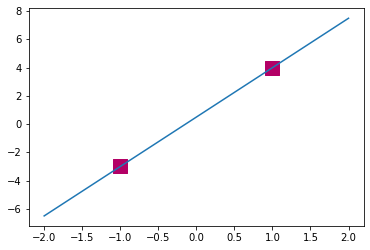

In [4]:
# Exemple
A = np.array([-1,-3])
B = np.array([ 1, 4])

y = lambda x : (B[1]-A[1])/(B[0]-A[0])*x + (A[1]*B[0] - B[1]*A[0])/(B[0]-A[0])

x = np.linspace(-2,2,10)

plt.scatter([A[0],B[0]],[A[1],B[1]],s = 200, marker = 's', color = [[0.7,0.0,0.4]])
plt.plot(x,y(x))
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM :</p>

Déterminez une équation de la droite passant par les points $A(-1;-3)$ et $B(1;4)$

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

+ Etant donné un nuage de points dont les abscisses sont stockés dans un `numpy.array` $X$ et les ordonnées dans un `numpy.array` $Y$, tracez la ligne brisée passant par tous les points du nuage.
+ On suppose que les abscisses sont ordonnées de manière croissante
+ Utilisez également un `scatter` pour faire apparaitre le nuage sur le même graphique.

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

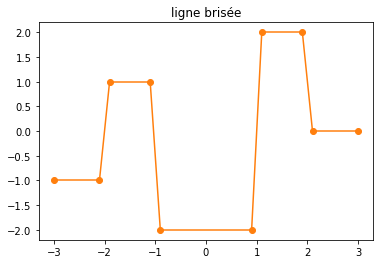

In [87]:
# Insérez votre code
def tracer(X,Y):
    for i in range(len(X)-1):
        plt.plot([X[i],X[i+1]],[Y[i],Y[i+1]], c='C01')
plt.scatter(X,Y, c='C01')
plt.title('ligne brisée')

tracer(X,Y)
plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Fonctions quadratiques</p>

Etant donnés deux points, il y passe une unique droite mais une infinité de paraboles. 

Il est alors possible de contrôler les tangentes.

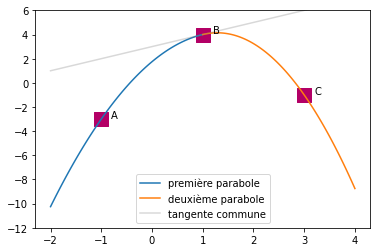

In [99]:
# Exemple
A = np.array([-1,-3])
B = np.array([ 1, 4])
C = np.array([ 3,-1])

"""
On cherche deux paraboles :
+ La première passe par A et B
+ La seconde par B et C
+ Les tangentes des paraboles en B sont identiques.

!!! A compléter en CM !!!
"""

def f(x,a,b,c):
    return(a*x**2+b*x+c)

def find(A,B,T,p):
    L1 = np.array([A[0]**2, A[0], 1])
    L2 = np.array([B[0]**2, B[0], 1])
    
    if p==0:
        L3 = np.array([2*A[0], 1, 0])
    elif p==1:
        L3 = np.array([2*B[0], 1, 0])
    
    M = np.array([L1,L2,L3])
    
    Coef = np.linalg.solve(M, [A[1], B[1], T])
    return Coef

T = 1

T1 = find(A,B,T,1)
T2 = find(B,C,T,0)

tan = lambda x : T*x + B[1]-T*B[0]

x1 = np.linspace(-2,B[0],100)
x2 = np.linspace(B[0],4,100)
y1 = f(x1, T1[0], T1[1], T1[2])
y2 = f(x2, T2[0], T2[1], T2[2])


plt.scatter([A[0],B[0],C[0]],[A[1],B[1],C[1]],s = 200, marker = 's', color = [[0.7,0.0,0.4]])
plt.annotate("A", (A[0]+0.2,A[1]+0.1))
plt.annotate("B", (B[0]+0.2,B[1]+0.1))
plt.annotate("C", (C[0]+0.2,C[1]+0.1))
plt.plot(x1, y1, label="première parabole")
plt.plot(x2, y2, label="deuxième parabole")
plt.plot(np.hstack([x1,x2]),tan(np.hstack([x1,x2])), c='gray', alpha = 0.3, label='tangente commune')

plt.ylim((-12,6))
plt.legend()

plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM :</p>

On considère les points $A(-1;-3), B(1;4)$ et $C(3;-1)$

Déterminez une équation des paraboles suivantes :

+ Passant par $A$ et $B$ et ayant une tangente horizontale en $A$
+ Passant par $A$, $B$ et $C$

Déterminez les équations du couple de parabole défini dans le commetaire de l'exemple ci-dessus.

In [7]:
# Elements pour le TP

"""
Résolution de systèmes linéaires AX = B
avec A matrice n x n et B matrice n x 1

ATTENTION : Ne fonctionne qu'avec les systèmes de Cramer ...
"""

A = np.array([[1,1,1,1],[1,-1,1,-1],[1,-1,-1,1],[1,1,-1,-1]])
print(A) # Matrice du système
B = np.array([[1],[1],[0],[0.5]])
print(B) # Second membre
X = np.linalg.solve(A,B) # Résolution du système
print(X)

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1 -1 -1  1]
 [ 1  1 -1 -1]]
[[1. ]
 [1. ]
 [0. ]
 [0.5]]
[[ 0.625]
 [ 0.125]
 [ 0.375]
 [-0.125]]


<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

+ Etant donné un nuage de points dont les abscisses sont stockés dans un `numpy.array` $X$ et les ordonnées dans un `numpy.array` $Y$, tracez courbe définies par morceaux par des paraboles joignant deux points consécutifs, telles qu'aux points de raccords les tangentes coïncident.
+ Afin d'obtenir un système de Cramer, ajoutez une tangente horizontale au début.
+ On suppose que les abscisses sont ordonnées de manière croissante
+ Utilisez également un `scatter` pour faire apparaitre le nuage sur le même graphique.

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

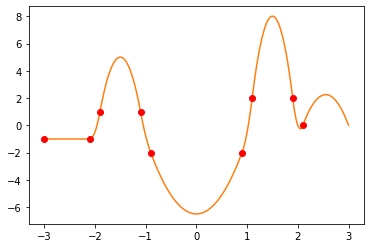

In [8]:
# Insérez votre code
X = np.array([-3.0,-2.1,-1.9,-1.1,-0.9, 0.9, 1.1, 1.9, 2.1, 3.0])
Y = np.array([-1.0,-1.0, 1.0, 1.0,-2.0,-2.0, 2.0, 2.0, 0.0, 0.0])

XX = []
for i in range(len(X)-1):
    XX.append(np.linspace(X[i],X[i+1],100))
XX = np.array(XX)

TT = [find((X[0],Y[0]),(X[1],Y[1]),0,0)]
for i in range(1,len(X)-1):
    tan = X[i]*2*TT[i-1][0]+TT[i-1][1]
    TT.append(find((X[i],Y[i]),(X[i+1],Y[i+1]),tan,0))

fig, ax = plt.subplots(1,1)

for i in range(len(XX)):
    y = f(XX[i], TT[i][0], TT[i][1], TT[i][2])
    ax.plot(X[i],Y[i],'or', zorder=3)
    ax.plot(XX[i],y,c='C01')


<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Parmi les méthodes les plus répandues d'interpolation polynômiale par morceaux, on trouve les **splines cubiques**.

Il s'agit d'une généralisation de ce qui précède à des polynômes de degré $3$. 

L'augmentation d'un degré, permet d'imposer une dérivée seconde nulle aux points de raccord.

A vous de jouer !

In [9]:
# Insérez votre code

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Fonctions polynômiales</p>

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Interpolation de Lagrange</p>

L'augmentation du degré du polynôme a permis dans le cas précédent de contrôler les tangentes.

Dans le cas de l'interpolation de Lagrange, il permet de passer par plus de points.

#### Cas général

**Attention aux notations**

**Passez du temps sur ces formules, pour bien les comprendre**

+ On se donne $n$-points dont les abscisses sont $X = \lbrack x_1,\ldots,x_n\rbrack$ et les ordonnées $Y = \lbrack y_1,\ldots,y_n\rbrack$.
+ On construit dans un premier temps un polynôme $P_i$ qui s'annulle en tous les $x_j,j\not=i$ et qui vaut $1$ en $x_i$.
$$P_i(x) = \prod_{j=1,j\not=i}^n \frac{x-x_j}{x_i-x_j}$$
$$P_i(x_i) = 1$$
$$P_i(x_j) = 0,j\not=i$$
+ On construit l'interpolateur de Lagrange passant par les points donnés :
$$P(x) = \sum_{i=1}^n y_i P_i(x)$$

**Remarque :** Le polynôme $P_i$ ne dépend que des abscisses $X$

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de CM :</p>

On considère les trois points : $(-1;-2), (0;2), (1;-1)$.

En utilisant les formules ci-dessus, calculez les polynômes $P_i$ et le polynôme $P$ ci-dessus.

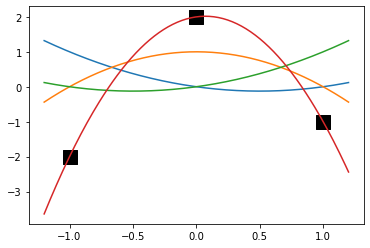

In [10]:
# Exemple

# Les abscissese : -1, 0, 1

# P_1 : vaut 1 en -1, 0 en 0, et 0 en 1
def P1(x):
    return ((x-0)/(-1-0))*((x-1)/(-1-1))
def P2(x):
    return ((x-(-1))/(0-(-1)))*((x-1)/(0-1))
def P3(x):
    return ((x-(-1))/(1-(-1)))*((x-0)/(1-0))

# Les ordonnées respectives : -2, 2, -1
def P(x):
    return -2*P1(x)+2*P2(x)-1*P3(x)

x = np.linspace(-1.2,1.2,200)
plt.plot(x,P1(x))
plt.plot(x,P2(x))
plt.plot(x,P3(x))
plt.plot(x,P(x))
plt.scatter([-1,0,1],[-2,2,-1],200, [[0,0,0]],'s')
plt.show()

#### Eléments de programmation fonctionnelle

`Python`, et bien d'autres langages, permettent d'utiliser les fonctions de la même manière que tous les autres objets.

En particulier, il est possible :

+ De faire passer des fonctions en paramètre d'autres fonctions
+ De retourner une fonction comme résultat d'une autre fonction.

La fonction `interp1d` utilisée précédemment est une fonction retournant une fonction.

<function puis.<locals>.mono at 0x000001FA875EE9D8>
9
9


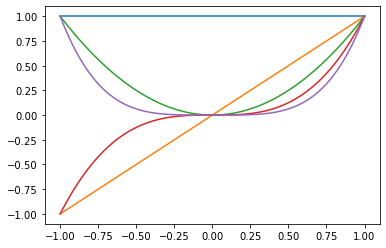

In [11]:
# Elements pour le TP
def valdeux(f): # Une fonction comme paramètre
    return f(2)

def valix(f,x): # Autre exemple
    return f(x)

def puis(n):
    def mono(x): # définition d'une fonction à l'intérieur d'une autre fonction
        return x**n
    return mono # retourne la fonction créée

def expo(f,n): # Une fonction en paramètre et en retour
    def res(x):
        return f(x) ** n
    return res

def expodeux(f,n): # Autre version avec `lambda`
    return lambda x : f(x) ** n

f = puis(2)
print(f)
print(f(3))
print(puis(2)(3))

x = np.linspace(-1,1,100)
for i in range(5):
    plt.plot(x,puis(i)(x))

plt.show()

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

**Attention aux notations**

+ Ecrivez une fonction `LagrangeI(X,i)` qui retourne la fonction $x \mapsto P_i(x)$ où $P_i$ est le $i^{\hbox{ième}}$ polynôme interpolateur de Lagrange. Le paramètre $X$ contient les abscisses de tous les points. Le polynôme $P_i$ s'annule en tous les points donnés sauf celui d'indice $i$.
+ Ecrivez une fonction `Lagrange(X,Y)` qui retourne la fonction $x \mapsto P(x)$ où $P$ est le polynôme interpolateur de Lagrange. Le paramètre $X$ contient les abscisses de tous les points, $Y$ les ordonnées. Le polynôme $P$ passe par tous les points donnés.
+ Testez vos fonctions avec les points $X = \lbrack -1,0,1 \rbrack$ et $Y = \lbrack 1,-1,4 \rbrack$. Tracez les courbes représentatives des $P_i$ et de $P$.
+ Testez à nouveau vos fonctions avec le nuage de points inital et observez un beau phénomène de Runge (oscillation incontrôlées).

**Déposez vos fonctions `LagrangeI(X,i)` et `Lagrange(X,Y)` sur Moodle avant la fin de la semaine**

In [23]:
# Insérez votre code
def LagrangeI(X,i):
    def Poly(x):
        P=1
        for j in range(len(X)):
            if j!=i :
                P*=(x-X[j])/(X[i]-X[j])
        return(P)
    return(Poly)

def Lagrange(X,Y):
    def Poly(x):
        P = 0
        for i in range(len(Y)):
            P+=Y[i]*LagrangeI(X,i)(x)
        return P
    return Poly
    

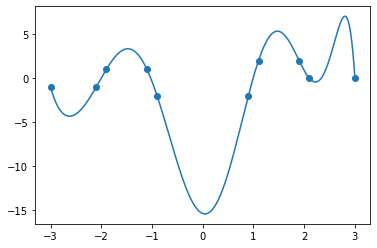

In [24]:
# Tests
X = np.array([-3.0,-2.1,-1.9,-1.1,-0.9, 0.9, 1.1, 1.9, 2.1, 3.0])
Y = np.array([-1.0,-1.0, 1.0, 1.0,-2.0,-2.0, 2.0, 2.0, 0.0, 0.0])

L = Lagrange(X,Y)

XX = np.linspace(X[0], X[-1], 1000)
YY = L(XX)

plt.plot(XX,YY)
plt.scatter(X,Y)


<p style="font-size:150%; line-height:150%; font-weight:bold; color:#2F52A3">Dessin comme un SVG</p>

Observez le code source des fichiers :

+ <a href="https://moodle.univ-lr.fr/2020/mod/resource/view.php?id=28048">arbre</a>
+ <a href="https://moodle.univ-lr.fr/2020/mod/resource/view.php?id=28051">feuille</a>

Il s'agit de "dessin vectoriel" : l'information stockée correspond à une description des courbes, pas de leur tracé.

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP :</p>

Dans cette partie, vous aurez besoin de trois outils :

+ Tracer le segment de droite $\lbrack A, B\rbrack$ avec les coordonnées de $A$ et $B$ sous la forme `A = np.array([2,9])` (ce problème a été résolu précédemment)
+ Tracer la parabole joignant $A,B$ et $C$ avec les coordonnées de $A,B$ et $C$ sous la forme `A = np.array([2,9])` (nouveau problème à résoudre)
+ Tracer la cubique joignant $A$ et $B$ dont les tangentes en $A$ et $B$ sont imposées; les points seront alors donnés sous la forme `A = np.array([abscisseA,ordonnéeA,pentetangenteA])`. (nouveau problème à résoudre)

**Quelques indications :**

+ Une cubique a pour équation $ax^3 + bx^2 + cx + d$ (4 paramètres inconnus).
+ Le problème possède 4 contraintes : passer par $A$, passer par $B$, avoir la bonne pente en $A$, avoir la bonne pente en $B$.
+ Pour résoudre le problème, il suffit de résoudre un système linéaire 4 x 4 dont les inconnues sont $a,b,c,d$.

**Les points à interpoler :**

+ Droites : 
    + $(-9,-1),(-6,8)$, 
    + $(2,9),(7,8)$, 
    + $(7,8),(10,-1)$.
+ Paraboles :     
    + $(-13;-3),(-11;0),(-8;2)$
    + $(-13;-3),(-5;-8),(0;-9)$
    + $(0;-9),(7;-8),(15;-3)$
    + $(9;2),(13;0),(15;-3)$
+ Cubiques : 
    + $(-6,8,0),(-2,7,-1)$, 
    + $(-2,7,0),(2,9,2)$, 
    + $(-8,2,-0.5),(0,0,0)$, 
    + $(0,0,0),(9,2,0.5)$
    + $(-9,-1,-0.5)$, $(0,-3,0)$
    + $(0,-3,0)$, $(10,-1,0.5)$

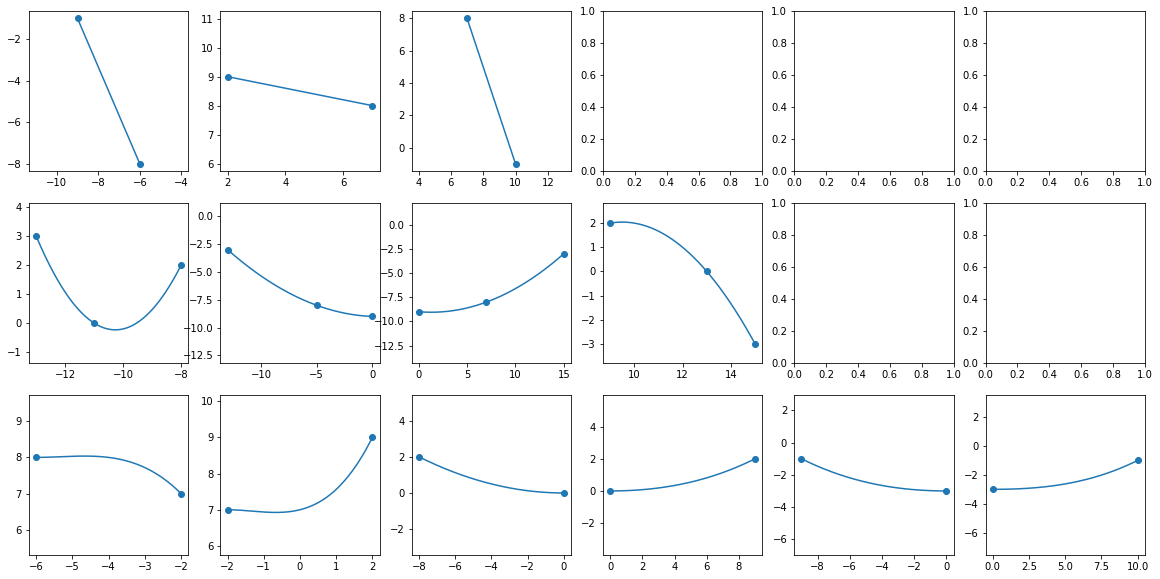

In [36]:
# Insérez votre code
def droite(A,B):
    a = (B[1]-A[1])/(B[0]-A[0])
    b = A[1]-a*A[0]
    return (lambda x:a*x+b)

def parabole(A,B,C):
    L1 = np.array([A[0]**2, A[0], 1])
    L2 = np.array([B[0]**2, B[0], 1])
    L3 = np.array([C[0]**2, C[0], 1])
    
    M = np.array([L1,L2,L3])
    
    Coef = np.linalg.solve(M, [A[1], B[1], C[1]])
    
    return (lambda x: Coef[0]*x**2 + Coef[1]*x + Coef[2])

def cubique(A, B, Ta, Tb):
    L1 = np.array([A[0]**3, A[0]**2, A[0], 1])
    L2 = np.array([B[0]**3, B[0]**2, B[0], 1])
    L3 = np.array([3*A[0]**2, 2*A[0], 1, 0])
    L4 = np.array([3*B[0]**2, 2*B[0], 1, 0])
    
    M = np.array([L1,L2,L3,L4])
    
    Coef = np.linalg.solve(M, [A[1], B[1], Ta, Tb])
    
    return (lambda x: Coef[0]*x**3 + Coef[1]*x**2 + Coef[2]*x + Coef[3])

fig, ax = plt.subplots(3,6, figsize=(20,10))

D1 = np.array([[-9,-1],[-6,-8]])
D2 = np.array([[2,9],[7,8]])
D3 = np.array([[7,8],[10,-1]])
D = np.array([D1,D2,D3])

for i in range(len(D)):
    X = np.linspace(D[i,0,0],D[i,-1,0],1000)
    f = droite(D[i,0],D[i,1])
    ax[0,i].plot(X,f(X))
    ax[0,i].scatter(D[i,:,0],D[i,:,1])
    ax[0,i].axis('equal')

P1 = np.array([[-13,3],[-11,0],[-8,2]])
P2 = np.array([[-13,-3],[-5,-8],[0,-9]])
P3 = np.array([[0,-9],[7,-8],[15,-3]])
P4 = np.array([[9,2],[13,0],[15,-3]])
P = np.array([P1,P2,P3,P4])

for i in range(len(P)):
    X = np.linspace(P[i,0,0],P[i,-1,0],1000)
    f = parabole(P[i,0],P[i,1], P[i,2])
    ax[1,i].plot(X,f(X))
    ax[1,i].scatter(P[i,:,0],P[i,:,1])
    ax[1,i].axis('equal')

C1 = np.array([[-6,8,0],[-2,7,-1]])
C2 = np.array([[-2,7,0],[2,9,2]])
C3 = np.array([[-8,2,-0.5],[0,0,0]])
C4 = np.array([[0,0,0],[9,2,0.5]])
C5 = np.array([[-9,-1,-0.5],[0,-3,0]])
C6 = np.array([[0,-3,0],[10,-1,0.5]])
C = np.array([C1,C2,C3,C4,C5,C6])

for i in range(len(C)):
    X = np.linspace(C[i,0,0],C[i,-1,0],1000)
    f = cubique(C[i,0],C[i,1],C[i,0,2],C[i,1,2])
    ax[2,i].plot(X,f(X))
    ax[2,i].scatter(C[i,:,0],C[i,:,1])
    ax[2,i].axis('equal')



**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

<p style="font-size:200%; line-height:200%; font-weight:bold; background-color:#2F52A3; color:white">Interpolation 2D</p>

Un beau dessin vaut mieux qu'un long discours $\ldots$

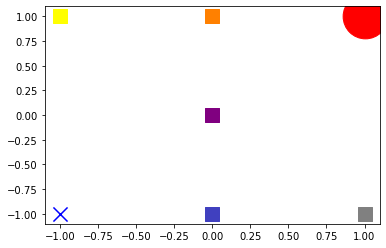

In [15]:
# En TP, il faudra faire de belles interpolations !

# Points d'entrée
plt.scatter(1,1,2000,[[1.0,0.0,0.0]],'o') # Rouge
plt.scatter(-1,1,200,[[1.0,1.0,0.0]],'s') # Jaune
plt.scatter(-1,-1,200,[[0.0,0.0,1.0]],'x') # Bleu
plt.scatter(1,-1,200,[[0.5,0.5,0.5]],'s') # Gris

# Points calculés

# Au milieu d'un coté (interpolation linéaire entre deux points)
plt.scatter(0,1,200,[[1.0,0.5,0.0]],'s') # Orange
plt.scatter(0,-1,200,[[0.25,0.25,0.75]],'s') # Gris-bleu

# Au milieu du carré (interpolation linéaire entre quatre points)

# Centre : moyenne des quatre coins :
# matplotlib.pyplot.scatter(0,0,200,[[0.625,0.375,0.375]],'s')

# Centre : moyenne d'une diagonale
plt.scatter(0,0,200,[[0.5,0.0,0.5]],'s')
plt.show()

**Calculs :**

+ Dans la situation ci-dessus, l'interpolation se fait dans l'espace RGB des couleurs, en fonction de la position des points dans le plan.
+ Chacune des composantes `RGB` de la couleur d'un point est calculée en fonction de sa position $(x,y)$ :
$$r = r(x,y), g = g(x,y), b = b(x,y)$$
+ Détaillons la composante $r$, les autres calculs sont identiques. Le modèle (plus ou moins arbitraire : 4 inconnues pour 4 sommets) choisi est :
$$r(x,y) = a + bx + cy + dxy$$
+ Il reste à trouver les coefficients $a,b,c,d$ en fonction des données (les points connus). C'est un système linéaire à résoudre $\ldots$ donc c'est facile :-) 

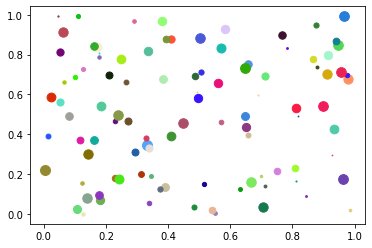

In [16]:
# Eléments pour le TP

"""
Dessiner des points de couleur et taille variable
"""
def point(x,y,size,color):
    plt.scatter(x,y,size,color)

def children_draw(n):
    for i in range(100):
        x = random.random()
        y = random.random()
        s = random.random()*100
        color = [[random.random(),random.random(),random.random()]]
        point(x,y,s,color)
    plt.show()

children_draw(200)

<p style="font-size:150%; line-height:150%; font-weight:bold; background-color:#FFDD00">Exercice de TP</p>

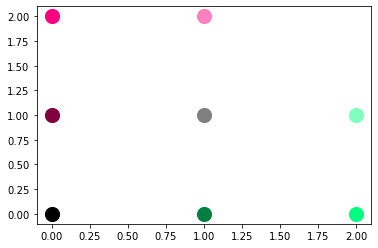

In [17]:
# On considère les 9 points suivant :
    
X = np.array([0,1,2,0,1,2,0,1,2])
Y = np.array([0,0,0,1,1,1,2,2,2])
R = np.array([0,0,0,0.5,0.5,0.5,1,1,1])
G = np.array([0,0.5,1,0,0.5,1,0,0.5,1])
B = np.array([0,0.25,0.5,0.25,0.5,0.75,0.5,0.75,1])

for i in range(9):
    plt.scatter(X[i],Y[i],200,[[R[i],G[i],B[i]]])

plt.show()

+ La figure ci-dessus est composée de $9$ points définissant $4$ "petits carrés". Le point gris au centre est un sommet commun aux $4$ carrés.
+ Ecrivez une fonction `addPoint(X,Y)` qui ajoute un point à la figure. Les coordoonées $(x,y)$ de ce point seront choisies aléatoirement (entre $0$ et $2$). Les trois canaux de couleur seront calculés à partir de la méthode d'interpolation vue en cours.
+ La fonction `addPoint(X,Y)` fera de l'interpolation à chaque fois entre quatre points, pour les quatre carrés de la figure. Une fois tirées aléatoirement, les coordonnées $(x,y)$ placent le point considéré dans un des $4$ carrés de la figure. Les couleurs des sommets de ce carré, dans lequel se situe le point, seront utilisées pour interpoler la couleur du point tiré.

**Appelez l'enseignant pour qu'il valide votre représentation graphique.**

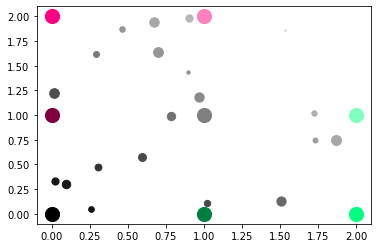

In [70]:
# Insérez votre code

def tabCoins():
    zone1 = [6,7,3,4]
    zone2 = [7,8,4,5]
    zone3 = [3,4,0,1]
    zone4 = [4,5,1,2]
    return np.array([zone1,zone2,zone3,zone4])

def getZone(x,y):
    if y>1 :
        if x<1 :
            return 0
        else :
            return 1
    else :
        if x<1 :
            return 2
        else :
            return 3

def createFunc(coins, X, Y):
    res = []
    for col in "RGB":
        M = np.zeros((4,4))
        N = np.zeros(4)
        for i in range(len(coins)):
            M[i] = [1,X[coins[i]],Y[coins[i]],X[coins[i]]*Y[coins[i]]]
            if col == "R":
                N[i] = R[coins[i]]
            elif col == "G":
                N[i] = G[coins[i]]
            elif col == "B":
                N[i] = B[coins[i]]

        Coef=np.linalg.solve(M, N)
        res.append(lambda x,y : Coef[0] + Coef[1]*x + Coef[2]*y + Coef[3]*x*y)

    return(np.array(res))

def addPoint(X,Y):
    x = 2*random.random()
    y = 2*random.random()
    size = random.random()*100
    coins = tabCoins()[getZone(x,y)]
    r,g,b = createFunc(coins,X,Y)
    couleur = [r(x,y), g(x,y), b(x,y)]
    plt.scatter(x,y,size,color=couleur)

X = np.array([0,1,2,0,1,2,0,1,2])
Y = np.array([0,0,0,1,1,1,2,2,2])
R = np.array([0,0,0,0.5,0.5,0.5,1,1,1])
G = np.array([0,0.5,1,0,0.5,1,0,0.5,1])
B = np.array([0,0.25,0.5,0.25,0.5,0.75,0.5,0.75,1])

for i in range(9):
    plt.scatter(X[i],Y[i],200,[[R[i],G[i],B[i]]])

for i in range(20):
    addPoint(X,Y)
    

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#AD84AD">Pour aller plus loin :</p>

Généraliser votre fonction `addPoint` pour qu'elle travaille avec un quadrillage quelconque en entrée.

In [19]:
# Insérez votre code

<p style="font-size:150%; line-height:150%; font-weight:bold; color:#D67D3A">Attention : </p>

+ Pour le TP02, pendant la séance, vous avez $4$ exercices à montrer : graphique de `interp1d`, graphique de ligne brisée, graphique "comme un SVG", graphique d'interpolation 2d.
+ Pour le TP02, avant la fin de semaine, vous avez $2$ fonctions à déposer : `LagrangeI(X,i)` et `Lagrange(X,Y)`.
+ Lors de l'évaluation sur feuille, il vous sera demandé de calculer "à la main", des polynômes d'interpolation. Il faudra connaitre les formules pour les polynômes de Lagrange et savoir résoudre des systèmes linéaires.